In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
# Set callback functions to early stop training and save the best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam





from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [2]:
data=pd.read_csv("/kaggle/input/bitsf312-lab1/train.csv",encoding="utf-8",index_col=0)

data.head()


,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class
ID,,,,,,,,,,,,
0,2,0,Medium,19,68,3,3,2,7,1.26166000108657,133.0,0
1,2,0,Medium,20,66,3,3,2,7,1.44296997784168,59.0,3
2,2,0,Medium,20,87,3,3,2,10,8.31096867770419,79.0,0
3,2,0,?,21,73,3,3,2,8,9.43591274696865,43.0,0
4,2,0,Medium,16,53,3,3,2,7,1.16976754958987,18.0,4


In [3]:
data["Class"].value_counts()

0    111
5     81
2     80
4     44
3     33
1     22
Name: Class, dtype: int64

In [4]:
for columns in data.columns:
  data.drop( data[ data[columns] == "?" ].index , inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
data["Size"].unique()

array(['Medium', 'Small', 'Big'], dtype=object)

In [6]:
data.shape
data['Size'] = data['Size'].map({
    'Small': 0, 
    'Medium': 1,
    'Big':2
    })
data.head()

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class
ID,,,,,,,,,,,,
0,2,0,1,19,68,3,3,2,7,1.26166000108657,133.0,0
1,2,0,1,20,66,3,3,2,7,1.44296997784168,59.0,3
2,2,0,1,20,87,3,3,2,10,8.31096867770419,79.0,0
4,2,0,1,16,53,3,3,2,7,1.16976754958987,18.0,4
5,2,0,1,18,64,3,3,2,7,1.30438968541013,77.0,4


In [7]:
len(data.columns)

12

In [8]:
x_train = data.iloc[:,:11]

In [9]:


y_train = data.iloc[:,11]

In [10]:
x_train.shape

(356, 11)

In [11]:


y_train.shape


(356,)

In [12]:
x_train["Size"].unique()

array([1, 0, 2])

In [13]:

y_train.unique()


array([0, 3, 4, 2, 5, 1])

In [14]:







y_train_enc = to_categorical(y_train)

In [15]:
y_train_enc


array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
y_train

ID
0      0
1      3
2      0
4      4
5      4
      ..
366    2
367    0
368    2
369    5
370    0
Name: Class, Length: 356, dtype: int64

In [17]:
x_train.head()

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score
ID,,,,,,,,,,,
0,2,0,1,19,68,3,3,2,7,1.26166000108657,133.0
1,2,0,1,20,66,3,3,2,7,1.44296997784168,59.0
2,2,0,1,20,87,3,3,2,10,8.31096867770419,79.0
4,2,0,1,16,53,3,3,2,7,1.16976754958987,18.0
5,2,0,1,18,64,3,3,2,7,1.30438968541013,77.0


In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 370
Data columns (total 11 columns):
Number of Quantities                  356 non-null object
Number of Insignificant Quantities    356 non-null object
Size                                  356 non-null int64
Total Number of Words                 356 non-null object
Total Number of Characters            356 non-null int64
Number of Special Characters          356 non-null object
Number of Sentences                   356 non-null int64
First Index                           356 non-null int64
Second Index                          356 non-null int64
Difficulty                            356 non-null object
Score                                 356 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 33.4+ KB


In [19]:

def create_model():
  model = Sequential()
  model.add(Dense(32,input_dim=11, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(rate=0.2))
  model.add(Dense(6,activation='softmax'))
  

  # Compile 
  adam = Adam(lr=10**-3)
  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
  print(model.summary())
  return model


In [20]:


def model_train(X_train, Y_train, n_folds, iterr, bsize):
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=7)
    hist = []
    val_hist=[]
    acc=[]
    val_acc=[]
    for train, test in kfold.split(X_train, Y_train):
        #----------------Build NN model--------
        new_model = create_model()
        #----------------Fit the model-----------------
        xtr = X_train.iloc[train]
        ytr = Y_train[train]
        xval = X_train.iloc[test]
        yval = Y_train[test]
    
        
        history = new_model.fit(xtr, ytr,validation_data=(xval, yval), epochs=iterr, batch_size=bsize, verbose=1)
        hist.append(history.history['loss'])
        val_hist.append(history.history['val_loss'])
        acc.append(history.history['accuracy'])
        val_acc.append(history.history['val_accuracy'])
        plt.figure()
        plt.plot(history.history['loss'], label = "Training Loss")
        plt.plot(history.history['val_loss'], label = "Validation loss")
        plt.xlabel('Number of epochs')
        plt.legend()
        plt.show()
    mean_val_hist = np.mean(val_hist,axis=0)
    main_iterr = np.argmin(mean_val_hist)
    print('main iteration is:',main_iterr)
    return main_iterr
        
        

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

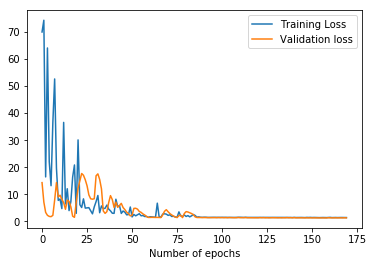

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

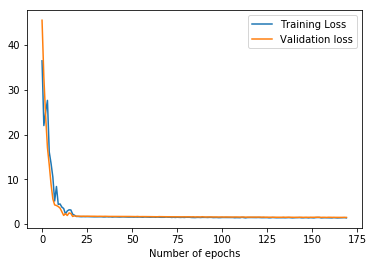

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

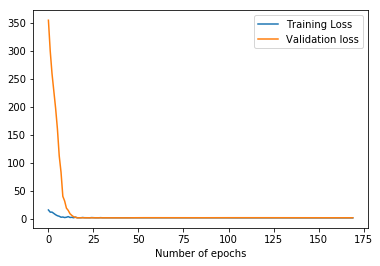

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

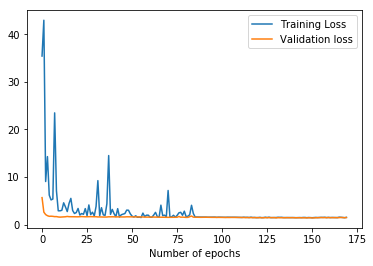

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_10 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

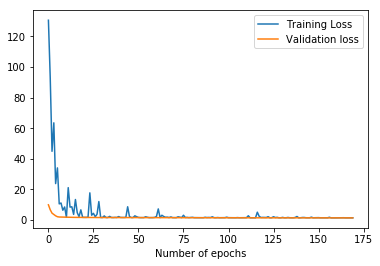

main iteration is: 164


In [21]:
main_iterr = model_train(x_train, y_train_enc, 5, 170, 20)

In [22]:
new_model = create_model()
new_model.fit(x_train, y_train_enc, epochs=main_iterr, batch_size=20, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_12 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 54        
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
____________________________________________________

In [23]:
scores = new_model.evaluate(x_train, y_train_enc, verbose=0)
print(scores)

[1.3406103507856304, 0.5786516666412354]


In [24]:
df=pd.read_csv("/kaggle/input/bitsf312-lab1/test.csv",encoding="utf-8",index_col=0)

In [25]:

df.head()


,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score
ID,,,,,,,,,,,
371,2,0,Medium,35,108,3,3,0,10,3.951158,21.0
372,2,0,Medium,16,53,2,2,2,5,6.534513,5.0
373,3,1,Medium,39,140,3,3,2,18,5.918632,9.0
374,2,0,Medium,17,59,3,3,2,7,8.226405,58.0
375,2,0,Medium,18,74,2,2,2,6,5.077213,105.0


In [26]:


for columns in df.columns:
  df[columns].unique()
  print(columns,df[columns].unique())

Number of Quantities [2 3]
Number of Insignificant Quantities [0 1]
Size ['Medium' 'Big' 'Small']
Total Number of Words [35 16 39 17 18 23 22 31 19 24 20 27 21 26 25 28 37 30 29 32 14 34]
Total Number of Characters [108  53 140  59  74  84  77 109  64  95  81 111  70  83  58  82  73  69
  75  80  98  97  85  71  62  87 101  55  67  78 121 100  79  51  60 119
  94 125  72  91 103  36  65  66 106 107  61 104  88  76  68  93  86  92
  96 110 139 105  99 124  90 117 102 132 115]
Number of Special Characters [3 2 1 4 7]
Number of Sentences [3 2 1 4 7]
First Index [ 0  2  3  4  5 11  9 10  6  7 12 15]
Second Index [10  5 18  7  6 13 11 14  8 16  9 15 20 12 17 19 21]
Difficulty [3.95115847 6.53451347 5.91863208 8.22640547 5.07721278 6.39265636
 5.73205455 0.3018889  7.49325924 3.47131815 5.00116157 5.94505973
 9.04104537 2.3189681  0.77672096 6.03061442 6.74744815 1.2209892
 1.67978236 0.77407546 8.68809086 7.63686118 6.29261948 6.22909031
 8.50221857 9.98210197 8.70999719 1.2814208  3.348493

In [27]:
df.shape
df['Size'] = df['Size'].map({
    'Small': 0, 
    'Medium': 1,
    'Big':2
    })
df.head()

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score
ID,,,,,,,,,,,
371,2,0,1,35,108,3,3,0,10,3.951158,21.0
372,2,0,1,16,53,2,2,2,5,6.534513,5.0
373,3,1,1,39,140,3,3,2,18,5.918632,9.0
374,2,0,1,17,59,3,3,2,7,8.226405,58.0
375,2,0,1,18,74,2,2,2,6,5.077213,105.0


In [28]:
y_pred = new_model.predict(df)

In [29]:
y_pred

array([[3.98804545e-01, 5.68068624e-02, 2.62115359e-01, 1.12025186e-01,
        1.34785861e-01, 3.54622565e-02],
       [2.35684156e-01, 7.66869783e-02, 1.05628870e-01, 9.03669149e-02,
        1.22428499e-01, 3.69204551e-01],
       [2.35684156e-01, 7.66869783e-02, 1.05628870e-01, 9.03669149e-02,
        1.22428499e-01, 3.69204551e-01],
       [3.78880948e-01, 6.78227916e-02, 2.22530723e-01, 1.16902001e-01,
        1.42927125e-01, 7.09363669e-02],
       [3.99531841e-01, 5.62281720e-02, 2.64156967e-01, 1.11674793e-01,
        1.34250611e-01, 3.41576859e-02],
       [2.37844214e-01, 7.70101249e-02, 1.06722325e-01, 9.11699012e-02,
        1.23153053e-01, 3.64100426e-01],
       [2.35684156e-01, 7.66869783e-02, 1.05628870e-01, 9.03669149e-02,
        1.22428499e-01, 3.69204551e-01],
       [3.05918574e-01, 8.19770470e-02, 1.47315130e-01, 1.11404076e-01,
        1.40116721e-01, 2.13268414e-01],
       [3.99964899e-01, 5.58731034e-02, 2.65410721e-01, 1.11455694e-01,
        1.33917481e-01, 

In [30]:
np.shape(y_pred)

(159, 6)

In [31]:






df.shape


(159, 11)

In [32]:
list1 = []
for i in range(len(y_pred)):
  temp = y_pred[i,:]
  ind = np.argmax(temp)
  list1.append(ind)
y_test = np.array(list1)



In [33]:
y_test

array([0, 5, 5, 0, 0, 5, 5, 0, 0, 5, 5, 5, 2, 0, 0, 5, 0, 5, 0, 0, 5, 0,
       5, 0, 0, 0, 0, 5, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 0, 0, 0, 0, 0, 5,
       5, 2, 0, 5, 0, 2, 5, 0, 0, 0, 5, 2, 5, 2, 2, 5, 0, 2, 0, 2, 0, 0,
       5, 0, 5, 2, 0, 0, 2, 5, 0, 5, 0, 2, 2, 0, 2, 0, 5, 0, 5, 0, 2, 0,
       5, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 2, 5, 0, 0, 5, 0, 2, 0, 5, 5,
       0, 2, 5, 5, 0, 5, 0, 5, 0, 5, 2, 0, 5, 0, 5, 5, 0, 5, 0, 0, 0, 2,
       0, 0, 5, 5, 5, 0, 5, 0, 5, 5, 5, 2, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5,
       5, 2, 0, 0, 2])

In [34]:

df

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score
ID,,,,,,,,,,,
371,2,0,1,35,108,3,3,0,10,3.951158,21.0
372,2,0,1,16,53,2,2,2,5,6.534513,5.0
373,3,1,1,39,140,3,3,2,18,5.918632,9.0
374,2,0,1,17,59,3,3,2,7,8.226405,58.0
375,2,0,1,18,74,2,2,2,6,5.077213,105.0
...,...,...,...,...,...,...,...,...,...,...,...
525,2,0,0,35,132,3,3,15,20,1.790719,11.0
526,2,0,1,31,110,2,2,11,14,8.652943,432.0
527,2,0,1,19,65,3,3,2,8,7.604213,75.0


In [35]:
df_2 = df


In [36]:

col_name = df.columns

In [37]:
df_2["Class"] = 0

In [38]:
df_2

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class
ID,,,,,,,,,,,,
371,2,0,1,35,108,3,3,0,10,3.951158,21.0,0
372,2,0,1,16,53,2,2,2,5,6.534513,5.0,0
373,3,1,1,39,140,3,3,2,18,5.918632,9.0,0
374,2,0,1,17,59,3,3,2,7,8.226405,58.0,0
375,2,0,1,18,74,2,2,2,6,5.077213,105.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,0,0,35,132,3,3,15,20,1.790719,11.0,0
526,2,0,1,31,110,2,2,11,14,8.652943,432.0,0
527,2,0,1,19,65,3,3,2,8,7.604213,75.0,0


In [39]:
for i in range(len(y_test)):
  df_2.iloc[i,11] = y_test[i]


In [40]:


df_2

,Number of Quantities,Number of Insignificant Quantities,Size,Total Number of Words,Total Number of Characters,Number of Special Characters,Number of Sentences,First Index,Second Index,Difficulty,Score,Class
ID,,,,,,,,,,,,
371,2,0,1,35,108,3,3,0,10,3.951158,21.0,0
372,2,0,1,16,53,2,2,2,5,6.534513,5.0,5
373,3,1,1,39,140,3,3,2,18,5.918632,9.0,5
374,2,0,1,17,59,3,3,2,7,8.226405,58.0,0
375,2,0,1,18,74,2,2,2,6,5.077213,105.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525,2,0,0,35,132,3,3,15,20,1.790719,11.0,5
526,2,0,1,31,110,2,2,11,14,8.652943,432.0,2
527,2,0,1,19,65,3,3,2,8,7.604213,75.0,0


In [41]:
df_2 = df_2.drop(columns=col_name)

In [42]:
df_2.to_csv("submission.csv")

In [43]:


df_2

,Class
ID,
371,0
372,5
373,5
374,0
375,0
...,...
525,5
526,2
527,0


In [44]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):
  csv = df.to_csv(index=False)
  b64 = base64.b64encode(csv.encode())
  payload = b64.decode()
  html = '<a download="{filename}" href="data:text/csv;base64,{payload}"target="_blank">{title}</a>'
  html = html.format(payload=payload,title=title,filename=filename)
  return HTML(html)
create_download_link(df_2)